In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ad = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/score_updated.csv"))
ad.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
ad.shape

(96, 2)

In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [5]:
ad.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


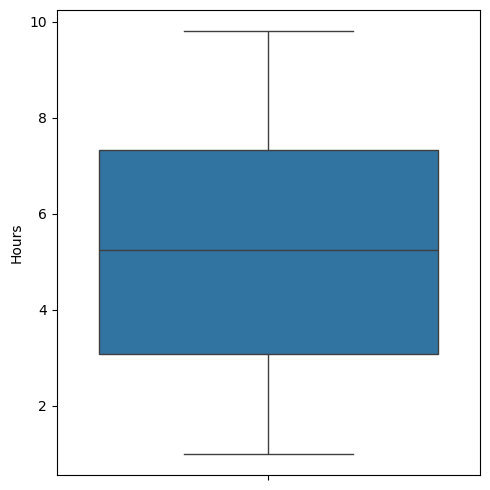

In [6]:
# Outlier Analysis
fig, axs = plt.subplots(1, figsize = (5,5))
plt2 = sns.boxplot(ad['Hours'], ax = axs)
plt.tight_layout()

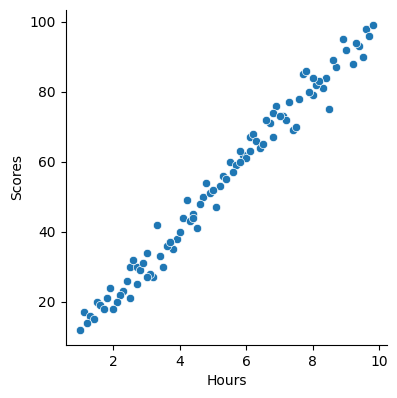

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(ad, x_vars=['Hours'],
             y_vars='Scores', height=4, aspect=1, kind='scatter')

plt.show()


# 1. A program for linear regression model using ML

In [8]:
x= ad.iloc[:, 0:1].values
y= ad.iloc[:, -1:].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred= regressor.predict(X_test)
x_pred= regressor.predict(X_train)

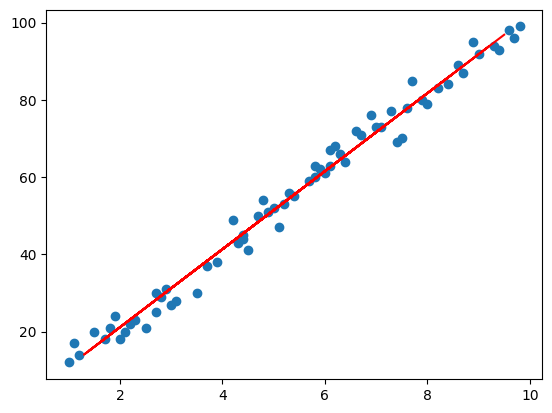

In [12]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color="red")
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(regressor, X_test, y_test, 'Linear Reg.')

,Linear Reg.
MAE,3.264075
MSE,17.507257
RMSE,4.184167
R2-Score,0.968793


# 2. A program for linear regression model using scikit-learn but no machine learning

In [14]:
X = ad['Hours']
y = ad['Scores']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
X_train.head()

,Hours
63,2.1
21,4.8
54,2.4
33,8.1
88,3.0


In [17]:
y_train.head()

,Scores
63,20
21,54
54,26
33,82
88,34


In [18]:
import statsmodels.api as sm

In [19]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [20]:
lr.params

,0
const,1.132569
Hours,10.053312


In [21]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     4084.
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           2.16e-60
Time:                        12:32:23   Log-Likelihood:                -173.15
No. Observations:                  67   AIC:                             350.3
Df Residuals:                      65   BIC:                             354.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1326      0.931      1.216      0.2

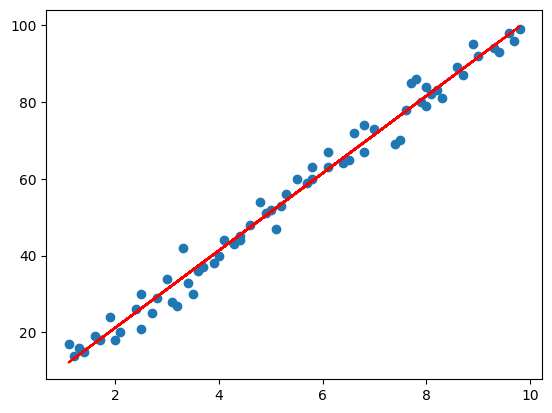

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.132569 + 10.053312*X_train, 'r')
plt.show()

In [23]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

In [24]:
y_pred.head()

,0
81,73.516419
73,31.292507
26,96.639038
29,48.383138
43,38.329826


In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.864048380353448

In [27]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9716750168641552

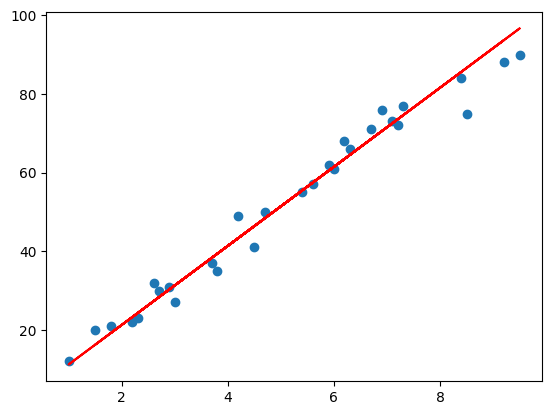

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.132569 + 10.053312 * X_test, 'r')
plt.show()

# 3. A program without using scikit-learn or machine learning for Linear regression (using Gradient Descent)

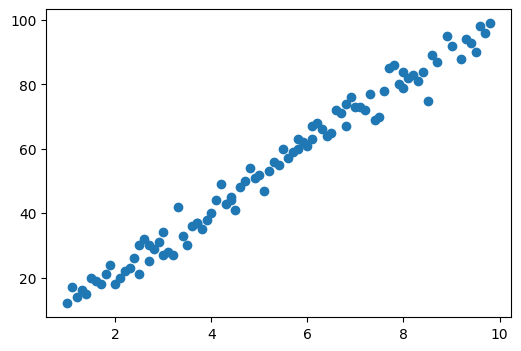

In [29]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)
X = ad.iloc[:, 0]
Y = ad.iloc[:, -1]
plt.scatter(X, Y)
plt.show()


In [32]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print (m, c)

9.93893811582043 1.5615174230742535


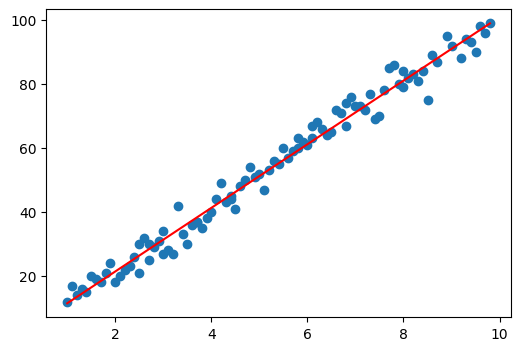

In [33]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [34]:
r_squared = r2_score(Y, Y_pred)
r_squared

0.9813357415626739

In [35]:
mse=np.sqrt(mean_squared_error(Y, Y_pred))
mse

3.399967371916206

# 4. What do the Coefficients of Regression signify?


The coefficients in a regression model represent the relationship between each independent variable and the dependent variable. Specifically, a coefficient indicates the expected change in the dependent variable for a one-unit increase in the independent variable, assuming all other variables are held constant. A positive coefficient suggests a direct relationship, while a negative coefficient indicates an inverse relationship. The magnitude reflects the strength of the relationship. In standardized regression models, coefficients can also indicate the relative importance of variables. Understanding these coefficients helps interpret the model's predictions and provides insights into the factors influencing the dependent variable.